In [1]:
from sklearn import datasets
import numpy as np 
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [2]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


-random_state parameter provides fixed random seed so that results are reprocubile 
-stratify ensures that training and test subsets have same proportions of class labels in input dataset


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [5]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [6]:
print('labels counts in y_test:', np.bincount(y_test))

labels counts in y_test: [15 15 15]


StandardScaler estiamted sample mean and standard deviation for each feature dimension from training data. 
transform then standardizes training data using those values
scaled both test and training data


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [11]:
from sklearn.metrics import accuracy_score
print('Accurecy:%.3f' % accuracy_score(y_test, y_pred))

Accurecy:0.978


In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
 
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
 
  # highlight test examples
  if test_idx:
      # plot all examples
      X_test, y_test = X[test_idx, :], y[test_idx]

      plt.scatter(X_test[:, 0], X_test[:, 1],
                  c='none', edgecolor='black', alpha=1.0,
                  linewidth=1, marker='o',
                  s=100, label='Test set')


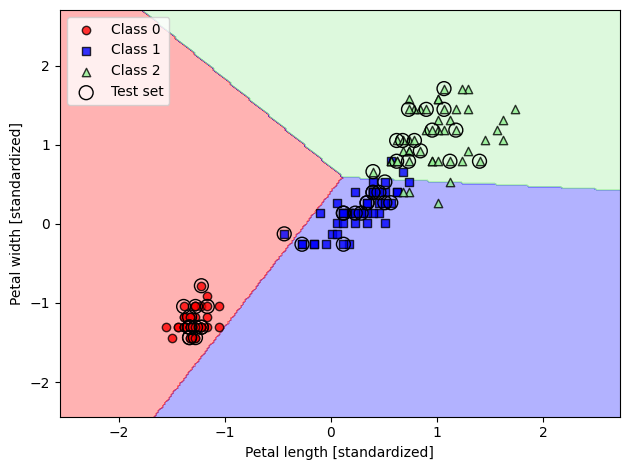

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


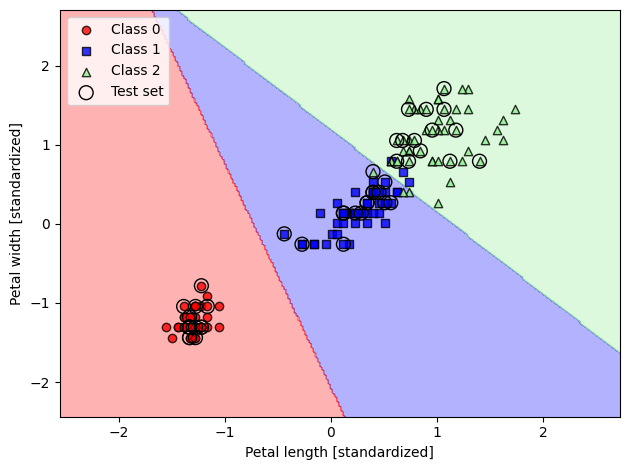

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

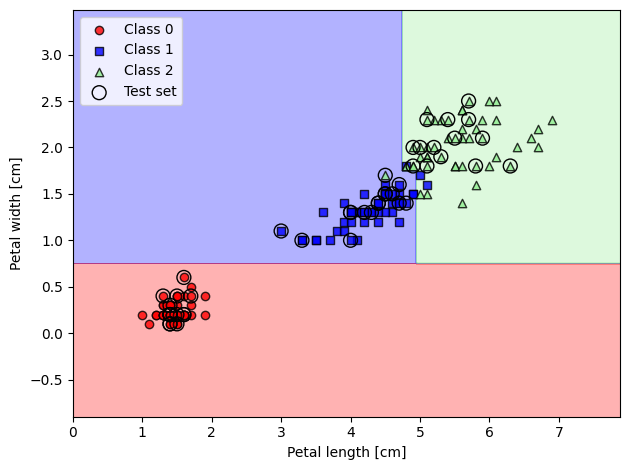

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
  max_depth=4,
  random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
  y_combined,
  classifier=tree_model,
  test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

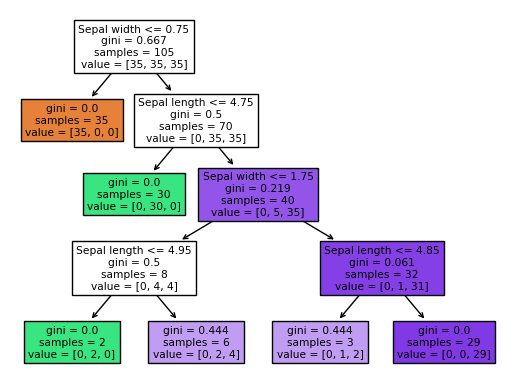

In [21]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
feature_names=feature_names,
filled=True)
plt.show()

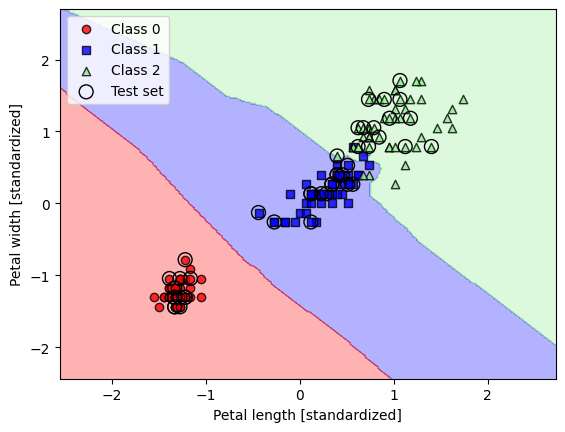

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()